In [1]:
import sys
import os

# modify syspath directory to sys.path

package_path = os.path.abspath(os.path.join('..','core'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..','utils'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..'))
if package_path not in sys.path:
    sys.path.append(package_path)

#print(sys.path)

In [2]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt

from IPython.display import HTML # both needed to disply gifs
from PIL import Image


In [3]:
# Import modules from the package
from core import create_hamiltonian as ch
from core import create_state as cs
from core import time_evo
from core.schmidt_solve import compute_schmidt_states
from core.schmidt_solve import compute_schmidt_states_all_time
from core.schmidt_solve import compute_schmidt_full
from core.schmidt_solve import compute_schmidt_states_new
from core.schmidt_solve import compute_schmidt_states_all_time_2
from core.eigen_ener_states import eigen_ener_states as eig
from utils.entropy import compute_VN, plot_VN, compute_VN_time
from utils import collapse_gif
from utils.collapse_gif import collapse_gif
from utils.display_gif import display_gif
from utils.distribution_gif import gif_distribution_eig_total
from utils.plot import plot_basic
from utils.plot import plot_with_binning
from utils.basic_functions import state_distribution_eig_tot

In [4]:
# Setting parameters for simulation TODO make a config file for this.

d1 = 10; d2 = 200; E_spacing = 1.0; E_int = 0.055; E_int2 = 0; E_env = 1; E_env2 = 0; w = [0,0,0,np.sqrt(0.3),0,0,0,np.sqrt(0.7),0,0]; envi=[0]; tmax = 15; ind_nb = 100; log = 0
env_sys=0
# Running the simulation and running the core functions
result, tlist, H_list, ket_list, info = time_evo(d1,d2,E_spacing, E_int, E_int2, E_env, E_env2,w,envi, tmax, ind_nb,log)
eigen = eig(H_list)
s_list = compute_schmidt_states_all_time(result, ind_nb)
ss_list = s_list[0]
se_list= s_list[1]
sv_list = s_list[2]

In [5]:
s_list_2 = compute_schmidt_states_all_time_2(result, ind_nb)


IndexError: list index out of range

In [ ]:
#testing my new function.
#its needs to be is s_list[index deciding on if it is syst, env, value or full][time index][which schmidt]

In [6]:
idx = 50

In [46]:
#Method 1

ss,se,sv=compute_schmidt_states_new(result, idx)

s1s = ss[0] #schmidt 1 on system 1
s1s = np.squeeze(s1s)
s2s = ss[1] #schmidt 1 on system 1
s2s = np.squeeze(s2s)
s1e = se[0] #schmidt 1 on system 2
s2e = se[1] #schmidt 1 on system 2


s1=np.outer(s1s,s1e).flatten()
s2=np.outer(s2s,s2e).flatten()

state_a=np.sqrt(sv[0])*s1+np.sqrt(sv[1])*s2
state=result.states[idx]



In [47]:
#Check normalization of state. orthogonality of schmidt states and reconstitution of state from schmidt states
print(abs(np.vdot(state,state))**2)
print(abs(np.vdot(state_a,state_a))**2)
print(abs(np.vdot(state_a,state))**2)
print(abs(np.vdot(s1s,s2s))**2)
print(abs(np.vdot(s1e,s2e))**2)


1.0
1.0000000000000004
1.0
2.7083389842945504e-35
1.564818079814629e-34


In [48]:
#method 2

s1s=ss_list[idx][0]
s2s=ss_list[idx][1]
s1e=se_list[idx][0]
s2e=se_list[idx][1]

s1=np.outer(s1s,s1e).flatten()
s2=np.outer(s2s,s2e).flatten()

state_b=np.sqrt(sv[0])*s1+np.sqrt(sv[1])*s2
state=result.states[idx]


In [49]:
#Check normalization of state. orthogonality of schmidt states and reconstitution of state from schmidt states
print(abs(np.vdot(state,state))**2)
print(abs(np.vdot(state_b,state_b))**2)
print(abs(np.vdot(state_b,state))**2)
print(abs(np.vdot(s1s,s2s))**2)
print(abs(np.vdot(s1e,s2e))**2)


1.0
1.0000000000000009
0.2543728632511274
2.7083389842945504e-35
1.9307447692482042e-32


In [40]:
#conclusion. method 2 doesn't work

(0.33888190720302547-0.13709718601599302j)


In [28]:
print(state_)

[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]


In [6]:
print(se)

(array([[ 0.07457549+0.j        ],
       [-0.04202889+0.0344461j ],
       [-0.07958051+0.02500139j],
       [ 0.03582917-0.03166297j],
       [-0.04729435-0.0116654j ],
       [-0.09863607-0.06673711j],
       [-0.0072062 -0.02117936j],
       [-0.03965635+0.02881992j],
       [ 0.03940723-0.02709006j],
       [-0.07296969-0.02371382j],
       [-0.02248539-0.01391786j],
       [ 0.01480635+0.05240733j],
       [ 0.0335011 +0.02487435j],
       [ 0.00575111-0.02562951j],
       [-0.04486313+0.03305917j],
       [ 0.05813846+0.00636366j],
       [-0.04349173+0.09278516j],
       [-0.06349238-0.0428609j ],
       [-0.05653961-0.06670702j],
       [-0.06829336-0.04088589j],
       [ 0.04444197-0.05324454j],
       [-0.07806046-0.01544907j],
       [-0.04525337-0.02358189j],
       [-0.07157819-0.05838514j],
       [-0.01900298-0.05349775j],
       [-0.02220716-0.03502208j],
       [-0.08439347-0.00256759j],
       [ 0.04876441+0.02597279j],
       [ 0.04916804+0.01835458j],
       [-0.03

In [7]:
print(b)

[ 0.05131445+0.05411405j -0.0539146 -0.0067954j  -0.07290005-0.0405427j
  0.04762913+0.00421175j -0.02407791-0.04234491j -0.01944393-0.11749405j
  0.01040984-0.01980227j -0.04819958-0.00894513j  0.04677292+0.00995466j
 -0.03300211-0.06926603j -0.00537272-0.02589273j -0.02784016+0.04680472j
  0.00500216+0.04142506j  0.02255475-0.01346217j -0.05485841-0.00980634j
  0.0353867 +0.04656564j -0.09725361+0.03228549j -0.01258724-0.07556389j
  0.00950028-0.08692698j -0.01732386-0.07768863j  0.06921568-0.00438857j
 -0.04250214-0.06727316j -0.01402659-0.04906351j -0.00688616-0.0921132j
  0.02574375-0.05060021j  0.01013253-0.04021239j -0.05620697-0.06300498j
  0.01470759+0.05325636j  0.02051331+0.04830725j  0.01720472-0.06392845j
 -0.0284193 -0.01453855j -0.1018678 -0.02751078j  0.04963632-0.02997212j
  0.04375501-0.02770389j -0.05149381+0.00586379j  0.06868691-0.08318726j
  0.00487384-0.03766157j -0.01672104-0.01171102j -0.04581183+0.05880512j
 -0.03505834-0.08929634j -0.01719281-0.10131366j -0.0

SyntaxError: invalid syntax (2195115835.py, line 3)

In [5]:
path = gif_distribution_eig_total(result,eigen, info)
display_gif(path)

[10, 200, 1.0, 0.055, 0, 1, 0, [0, 0, 0, 0.5477225575051661, 0, 0, 0, 0.8366600265340756, 0, 0], [0], 15, 100, 0]
../outputs/gifs/distrib_EI_[10, 200, 1.0, 0.055, 0, 1, 0, [0, 0, 0, 0.5477225575051661, 0, 0, 0, 0.8366600265340756, 0, 0], [0], 15, 100, 0].gif


In [ ]:
gif_path = collapse_gif(eigen, s_list, info,env_sys)

display_gif(gif_path)


/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


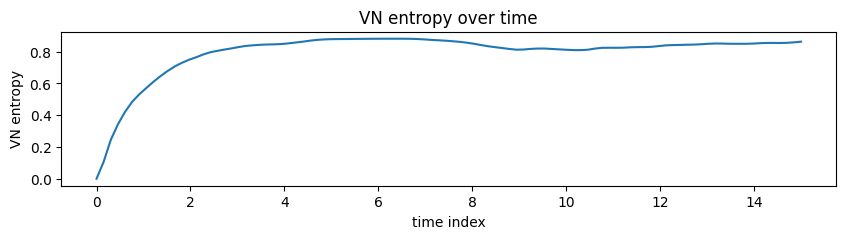

In [10]:
plot_VN(result,tlist,log=0)

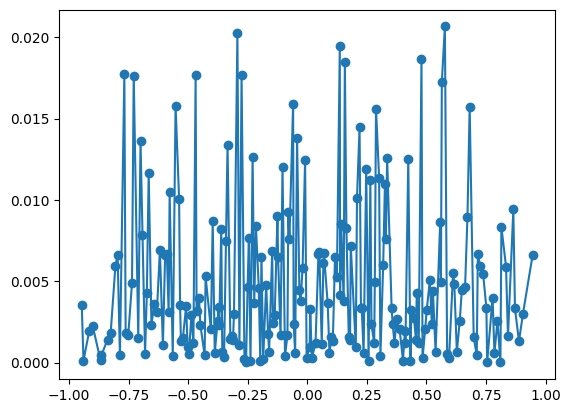

In [7]:

eigenenergies_system_2, eigenstates_system_2 = H_list[7].eigenstates() 
eigenenergies_system_total, eigenstates_system_total = H_list[1].eigenstates() 
eigenenergies_system_1, eigenstates_system_1 = H_list[6].eigenstates() 

# Plot 2: Distribution of the Environment state over the environment energy eigenstates
time_index = 10  # Define the time index
s0 = compute_schmidt_states(result, time_index, 1)[0]
schmidt_coefficients0 = [abs(np.vdot(s0, eigenstate)) ** 2 for eigenstate in eigenstates_system_2]
plt.plot(eigenenergies_system_2, schmidt_coefficients0, marker='o', label=f'Energy {eigenenergies_system_2}')

    


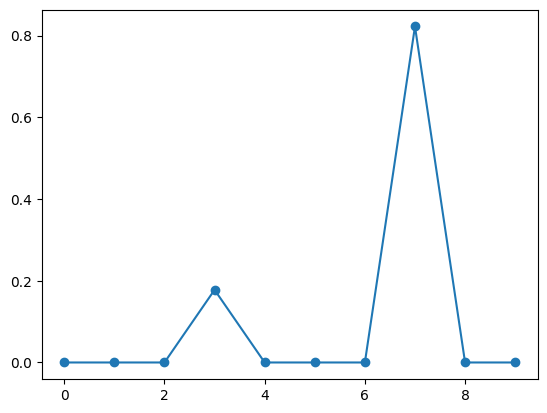

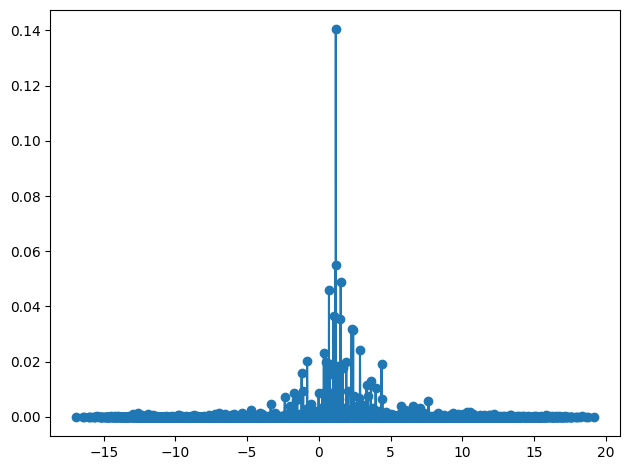

In [8]:
    # Plot 3: Distribution of the System state over the system energy eigenstates
    s0 = compute_schmidt_states(result, time_index, 0)[0]
    schmidt_coefficients0 = [abs(np.vdot(s0, eigenstate)) ** 2 for eigenstate in eigenstates_system_1]
    plt.plot(eigenenergies_system_1, schmidt_coefficients0, marker='o', label=f'Energy {eigenenergies_system_1}')
    #axes[1, 0].set_title("Distribution of the System state over the system energy eigenstates")
    #axes[1, 0].set_xlabel("Energy Eigenstates")
    #axes[1, 0].set_ylabel("Schmidt Coefficients")
    plt.show()
    # Plot 4: Distribution of the state over the energy eigenstates
    s0 = result.states[0]
    schmidt_coefficients0 = [abs(np.vdot(s0, eigenstate)) ** 2 for eigenstate in eigenstates_system_total]
    plt.plot(eigenenergies_system_total, schmidt_coefficients0, marker='o', label=f'Energy {eigenenergies_system_total}')
    #axes[1, 1].set_title("Distribution of the state over the energy eigenstates")
    #axes[1, 1].set_xlabel("Energy Eigenstates")
    #axes[1, 1].set_ylabel("Schmidt Coefficients")
    
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()